In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd

global count
global count2
count = 0
count2 =0

In [2]:
class Metropolis:
    def __init__(self,L,J=1,B=0):
        self.L = L
        self.N = L*L
        self.J = J
        self.B = B
        count1 = 0
        count2 = 0
        
        self.sc = np.ones(self.N,dtype=np.int0)
        self.prob = np.zeros(2,dtype=np.double)

    def prob_calc(self,beta):
        for i in range(2):
            # 4 8
            self.prob[i] = np.exp(-beta*4*(i+1))

    def measure(self,func):
        res = 0
        # print(self.sc)
        for i in range(self.N):
            sum = func(i)
            res += self.J*sum*self.sc[i]

        sigma = np.sum(self.sc)
        HH = -res -self.B*sigma

        return sigma, HH

    def helical(self,i):
        sum = 0

        nn = i + 1
        if(nn == self.N): nn = 0
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    
    def sweep_pbc(self,i):
        sum = 0

        nn = i -1
        if((nn+1 % self.L) == 0) : nn += self.L
        sum += self.sc[nn]

        nn = i + 1
        if(nn % self.L == 0): nn -= self.L
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum
    
    def sweep_helical(self,i):
        sum = 0

        nn = i -1
        if(nn < 0) : nn += self.N
        sum += self.sc[nn]

        nn = i + 1
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    def calculate(self):
        global count, count2
        for i in range(self.N):
            k = i
            # k = np.random.randint(self.N)
            # delta = Enew - Eold
            delta = 2*self.sc[k]*self.J*self.sweep_helical(k)
            count2 += 1
            # print(delta)
            if(delta <= 0): # A = 1
                count += 1
                self.sc[k] *= -1
            elif(np.random.rand() < self.prob[int(delta/4)-1]): #flip
                # print(delta, self.prob[int(delta/4)-1])
                count += 1
                self.sc[k] *= -1
        return 2*self.sc[k], delta

cnt = 20
cnt = 40
cnt = 80
cnt = 120
cnt = 200
cnt = 400
cnt = 800
cnt = 2000


<Figure size 3600x2400 with 0 Axes>

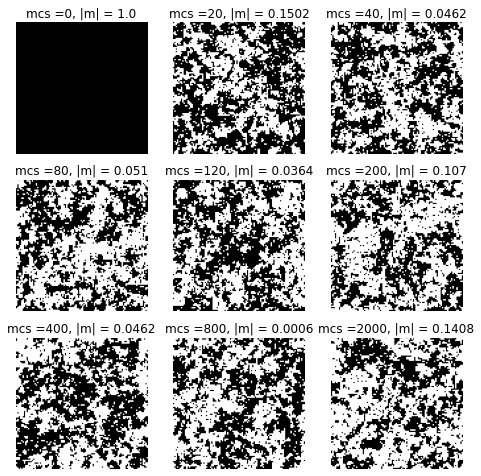

In [3]:
# Figure for equilibrium
T11 = Metropolis(100)
T = 2.6
T11.prob_calc(1/T)
ls , epoch = np.array([10,20,40,60,100,200,400,1000,10000]), 1000
ls , epoch = 2*ls, 2*epoch
# ls = [1,2,4,6,10,20,40,100,1000]
cnt = 0
plt.figure(dpi=600)
plt.figure(figsize=(8,8))
# plt.subplots(constrained_layout=True)
plt.subplot(3,3,1,aspect='equal')
plt.axis('off')
a = np.reshape(T11.sc,(T11.L,T11.L))
plt.title("mcs =" + "0" +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
plt.imshow(a,cmap="gray")

for i in range(epoch+1):
    if(i == ls[cnt]):
        cnt += 1
        plt.subplot(3,3,cnt+1)
        plt.axis('off')
        a = np.reshape(T11.sc,(T11.L,T11.L))
        plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
    T11.calculate()
plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# plt.subplot_tool()
plt.show()

cnt = 30
cnt = 60
cnt = 120
cnt = 180
cnt = 300
cnt = 600
cnt = 1200
cnt = 3000


<Figure size 3600x2400 with 0 Axes>

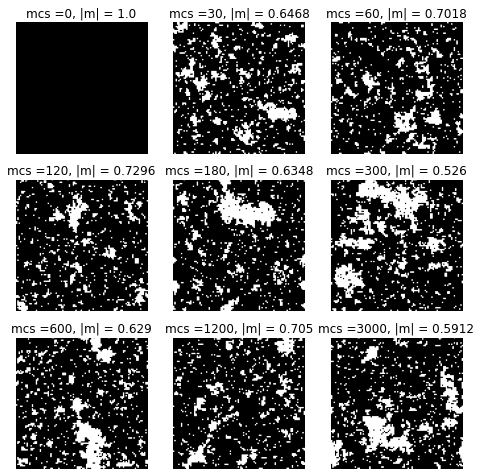

In [4]:
# Figure for equilibrium
T11 = Metropolis(100)
T = 2.27
T11.prob_calc(1/T)
ls , epoch = np.array([10,20,40,60,100,200,400,1000,10000]), 1000
ls , epoch = 3*ls, 3*epoch
# ls = [1,2,4,6,10,20,40,100,1000]
cnt = 0
plt.figure(dpi=600)
plt.figure(figsize=(8,8))
# plt.subplots(constrained_layout=True)
plt.subplot(3,3,1,aspect='equal')
plt.axis('off')
a = np.reshape(T11.sc,(T11.L,T11.L))
plt.title("mcs =" + "0" +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
plt.imshow(a,cmap="gray")

for i in range(epoch+1):
    if(i == ls[cnt]):
        cnt += 1
        plt.subplot(3,3,cnt+1)
        plt.axis('off')
        a = np.reshape(T11.sc,(T11.L,T11.L))
        plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
    T11.calculate()
plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# plt.subplot_tool()
plt.show()

cnt = 20
cnt = 40
cnt = 80
cnt = 120
cnt = 200
cnt = 400
cnt = 800
cnt = 2000


<Figure size 3600x2400 with 0 Axes>

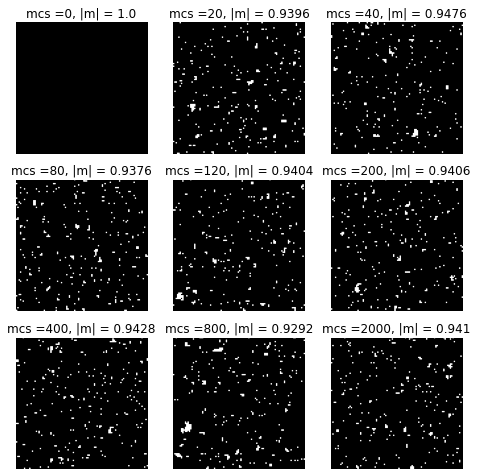

In [5]:
# Figure for equilibrium
T11 = Metropolis(100)
T = 1.9
T11.prob_calc(1/T)
ls , epoch = np.array([10,20,40,60,100,200,400,1000,10000]), 1000
ls , epoch = 2*ls, 2*epoch
# ls = [1,2,4,6,10,20,40,100,1000]
cnt = 0
plt.figure(dpi=600)
plt.figure(figsize=(8,8))
# plt.subplots(constrained_layout=True)
plt.subplot(3,3,1,aspect='equal')
plt.axis('off')
a = np.reshape(T11.sc,(T11.L,T11.L))
plt.title("mcs =" + "0" +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
plt.imshow(a,cmap="gray")

for i in range(epoch+1):
    if(i == ls[cnt]):
        cnt += 1
        plt.subplot(3,3,cnt+1)
        plt.axis('off')
        a = np.reshape(T11.sc,(T11.L,T11.L))
        plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
    T11.calculate()
plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# plt.subplot_tool()
plt.show()

cnt = 10
cnt = 20
cnt = 40
cnt = 60
cnt = 100
cnt = 200
cnt = 400
cnt = 1000


<Figure size 3600x2400 with 0 Axes>

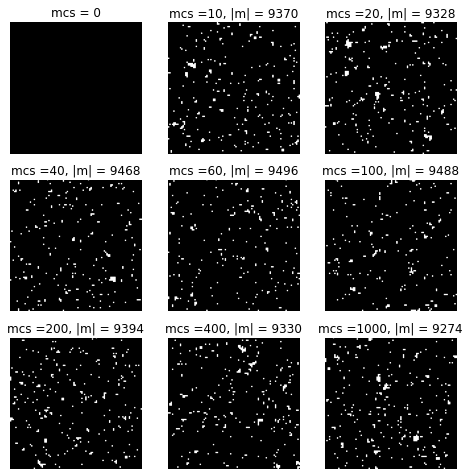

In [6]:
# Figure for equilibrium
T11 = Metropolis(100)
T = 1.9
T11.prob_calc(1/T)
ls = [10,20,40,60,100,200,400,1000,10000]
# ls = [1,2,4,6,10,20,40,100,1000]
cnt = 0
plt.figure(dpi=600)
plt.figure(figsize=(8,8))
# plt.subplots(constrained_layout=True)
plt.subplot(3,3,1,aspect='equal')
plt.axis('off')
a = np.reshape(T11.sc,(T11.L,T11.L))
plt.title("mcs = 0")
plt.imshow(a,cmap="gray")

for i in range(1001):
    if(i == ls[cnt]):
        cnt += 1
        plt.subplot(3,3,cnt+1)
        plt.axis('off')
        a = np.reshape(T11.sc,(T11.L,T11.L))
        plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc))))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
    T11.calculate()
plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# plt.subplot_tool()
plt.show()

In [ ]:
# temp = Metropolis(100)
# temp.prob_calc(1/(2.4)) #beta = T^-1
# ls = [10,20,40,60,100,200,400,1000,2000,3000,4000,10000,100000]
# cnt = 0
# a = np.reshape(temp.sc,(temp.L,temp.L))
# plt.imshow(a,cmap="gray")
# plt.show()

# for i in range(4001):
#     if(i == ls[cnt]):
#         cnt += 1
#         a = np.reshape(temp.sc,(temp.L,temp.L))
#         plt.imshow(a,cmap="Greys")
#         print("cnt =",ls[cnt-1])
#         plt.show()
#     temp.calculate()

In [8]:
# T = np.zeros(25,dtype=np.double)
# m = np.zeros(25,dtype=np.double)
# c = np.zeros(25,dtype=np.double)


# for i in range(25):
#     T[i] = 0.2*(i+1)

# for j in range(25):
#     count = 0
#     count2 = 0
#     M55 = Metropolis(5)
#     M55.prob_calc(1/T[j])
#     res = np.zeros(4,dtype=np.double)
#     for i in range(20000):
#         M55.calculate()
#     sigma, HH = M55.measure(M55.helical)
#     print("idx: ", j, "||",sigma,HH)
#     for i in range(180000):
#         M55.calculate()
#         sigma, HH = M55.measure(M55.helical)
#         res += np.array([np.absolute(sigma), sigma*sigma, HH, HH*HH])
#     res /= 18000 
#     m[j] = res[0]/M55.N
#     c[j] = (1/T[j])**2*(res[3]-res[2]**2)/M55.N
#     print(res)
#     print(m[j],c[j],count, count2)
#     print(M55.prob)


In [9]:
# bin = 40
# T = np.zeros(bin,dtype=np.double)
# m = np.zeros(bin,dtype=np.double)
# c = np.zeros(bin,dtype=np.double)
# res = np.zeros((bin,4),dtype=np.double)

# for i in range(bin):
#     T[i] = 5/bin*(i+1)

# for j in range(bin):
#     count = 0
#     count2 = 0
#     M55 = Metropolis(5)
#     M55.prob_calc(1/T[j])
#     for i in range(2000):
#         M55.calculate()
#     sigma, HH = M55.measure(M55.helical)
#     print("idx: ", j, "||",sigma,HH)
#     for i in range(18000):
#         M55.calculate()
#         sigma, HH = M55.measure(M55.helical)
#         res[j] += np.array([np.absolute(sigma), sigma*sigma, HH, HH*HH])
#     res[j] /= 18000 
#     m[j] = res[j][0]/M55.N
#     c[j] = (1/T[j])**2*(res[j][3]-res[j][2]**2)/M55.N
#     print(res[j])
#     print(m[j],c[j],count, count2)
#     # print(M55.prob)


In [10]:
#autocorrection time

bin = 1
T = np.zeros(bin,dtype=np.double)

# for i in range(bin):
#     T[i] = 5/bin*(i+1)

T[0] = 2.4
Tmax = 2000

for j in range(bin):
    chi0 = np.zeros(Tmax)
    count = 0
    count2 = 0
    M55 = Metropolis(100)
    M55.prob_calc(1/T[j])
    for i in range(Tmax):
        M55.calculate()
        sigma, HH = M55.measure(M55.helical)
        chi0[i] = sigma/10000
    # print(M55.prob)

In [11]:
chi1 = np.zeros(Tmax)
for t in range(Tmax):
    k = Tmax-t
    t1 = 0
    t2 = 0
    t3 = 0
    for tp in range(Tmax-t):
        t1 += chi0[tp]*chi0[tp+t]
        t2 += chi0[tp]
        t3 += chi0[tp+t]
    chi1[t] = (1/k)*(t1-(1/k)*t2*t3)

In [12]:
chi0t = np.zeros(Tmax + 1)
for i in range(Tmax):
    chi0t[i+1] = chi0t[i] + chi1[i]
chi0t /= chi1[0]

In [13]:
#autocorrection time
T_auto = 2.4
epoch = 10000 #mcs

mlist = np.zeros(epoch)

M100100 = Metropolis(100)
M100100.prob_calc(1/T_auto)
for i in range(epoch):
    M100100.calculate()
    sigma, HH = M100100.measure(M100100.helical)
    mlist[i] = sigma/10000

m_expec = np.average(mlist)


In [14]:
auto_chi = np.zeros(epoch)
mlist2 = mlist-m_expec
for i in range(epoch):
    auto_chi[i] = np.average(mlist2[0:epoch-i]*mlist2[i:epoch])

In [15]:
auto_chi2 = np.zeros(epoch)
for i in range(epoch):
    auto_chi2[i] = np.sum(mlist[0:epoch-i]*mlist[i:epoch])/(epoch-i) -np.sum(mlist[0:epoch-i])*np.sum(mlist[i:epoch])/(epoch-1)**2

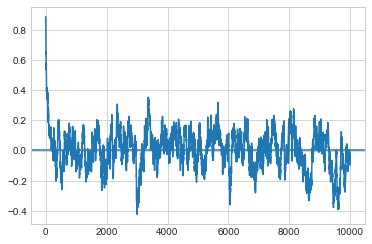

<Figure size 3600x2400 with 0 Axes>

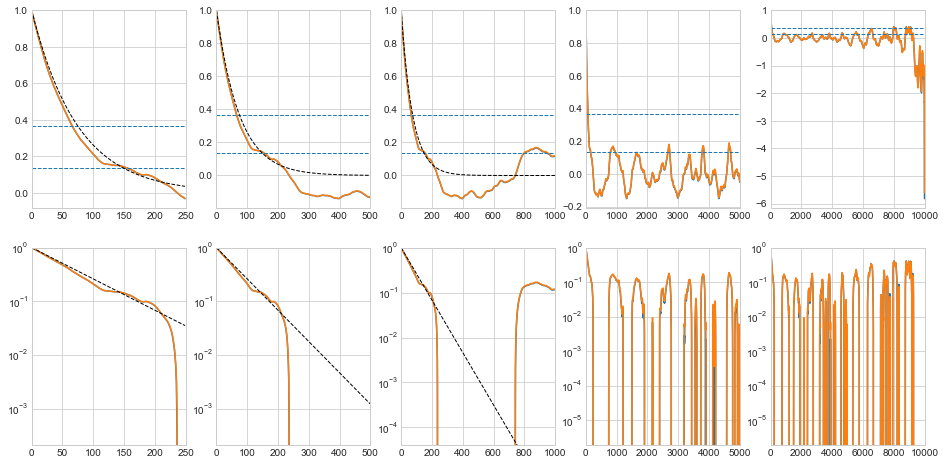

tau is 74.46808829015991


In [80]:
from matplotlib.ticker import MaxNLocator

##
## Tau about 74.46 (no error fitting)

## Drawing time vs. magnetizaiton
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(0,epoch),mlist)
plt.axhline(m_expec)
plt.show()

slice = [250,500,1000,5000,10000]
draw_fitting = [1,2,3]
cnt = 1
size = len(slice)

## Fitting calculation
_bin2 = 200
x = np.arange(0,_bin2)
y = auto_chi[0:_bin2]
tt = np.polyfit(x,np.log(y),1,w=np.sqrt(y))

## Drawing subplots of time vs autocorrelation of m
plt.figure(dpi=600)
plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

for _bin in slice:
    xx = np.arange(0,_bin)

    plt.subplot(2,size,cnt)
    plt.plot(xx,auto_chi[0:_bin]/auto_chi[0])
    plt.plot(xx,auto_chi2[0:_bin]/auto_chi2[0])
    plt.axhline(1/np.e,linestyle='--',lw=1)
    plt.axhline(1/np.e**2,linestyle='--',lw=1)
    plt.xlim(0,_bin)
    plt.ylim(None,1.0)
    if cnt in draw_fitting:
        aa = np.arange(0,_bin)
        bb = np.exp(tt[1]) *np.exp(tt[0]*aa)
        plt.plot(aa,bb/max(bb),linestyle='--',lw=1,color='black')

    plt.subplot(2,size,cnt+size)
    plt.semilogy(xx,auto_chi[0:_bin]/auto_chi[0])
    plt.semilogy(xx,auto_chi2[0:_bin]/auto_chi2[0])
    plt.xlim(0,_bin)
    plt.ylim(None,1.0)

    if cnt in draw_fitting:
        aa = np.arange(0,_bin)
        bb = np.exp(tt[1]) *np.exp(tt[0]*aa)
        plt.plot(aa,bb/max(bb),linestyle='--',lw=1,color='black')
    cnt = cnt + 1
plt.show()
print("tau is", -1/tt[0])

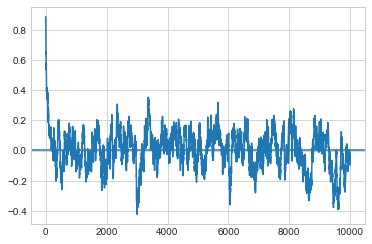

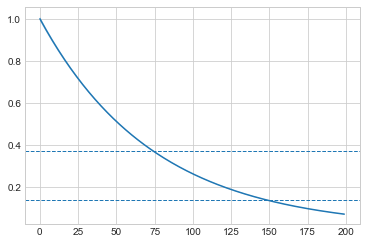

In [130]:
plt.plot(np.arange(0,epoch),mlist)
plt.axhline(m_expec)
plt.show()

_bin2 = 200
x = np.arange(0,_bin2)
y = auto_chi[0:_bin2]
tt, C_p = np.polyfit(x,np.log(y),1,w=np.sqrt(y),cov= True)

TT = np.vstack([x**(1-i) for i in range(2)]).T
yi = np.dot(TT,tt)
C_yi = np.dot(TT,np.dot(C_p,TT.T))
sig_yi = np.sqrt(np.diag(C_yi))

slice = [600,1000,5000,10000]
_bin = slice[0]
# plt.subplot(2,1,1)
fig, ax = plt.subplots(1,1)
# plt.plot(np.arange(0,_bin),auto_chi[0:_bin]/auto_chi[0])
# plt.plot(np.arange(0,_bin),auto_chi2[0:_bin]/auto_chi2[0])
ax.fill_between(x, np.exp(yi+sig_yi)/max(np.exp(yi)), np.exp(yi-sig_yi)/max(np.exp(yi)), alpha=.25)
plt.axhline(1/np.e,linestyle='--',lw=1)
plt.axhline(1/np.e**2,linestyle='--',lw=1)
plt.plot(x,np.exp(yi)/max(np.exp(yi)))